In [1]:
!wget "https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W" -O E-commerce.csv



7[Files: 0  Bytes: 0  [0 B/s] Re]87[https://drive.google.com/uc?ex]87E-commerce.csv         0% [<=>                           ]       0          B/s87HTTP response 303  [https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W]
87E-commerce.csv         0% [ <=>                          ]       0          B/s87Adding URL: https://drive.usercontent.google.com/download?id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W&export=download
87[Files: 0  Bytes: 0  [0 B/s] Re]87[https://drive.usercontent.goog]87[Files: 0  Bytes: 0  [0 B/s] Re]87[Files: 0  Bytes: 0  [0 B/s] Re]87[Files: 0  Bytes: 0  [0 B/s] Re]87Saving 'E-commerce.csv'
87E-commerce.csv       100% [=============================>]  136.54K    --.-KB/s87HTTP response 200  [https://drive.usercontent.google.com/download?id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W&export=download]
87E-commerce.csv       100% [=============================>]  136.54K    --.-KB/s87[Files: 1  Bytes: 136.54K [37.4]8

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./E-commerce.csv')
df.head()

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,1476,130,65,213.905831,31.600751,233,235
1,1535,543,46,639.223004,5.689175,228,170
2,1807,520,102,1157.402763,844.321606,247,409
3,1727,702,83,1195.903634,850.041757,148,200
4,1324,221,84,180.754616,64.283300,243,259


In [16]:
data_size = 1000
num_iters = 5
num_k = 4

from sklearn.datasets import make_blobs
data, y = make_blobs(n_samples=2000, centers=4, n_features=2,random_state=0)

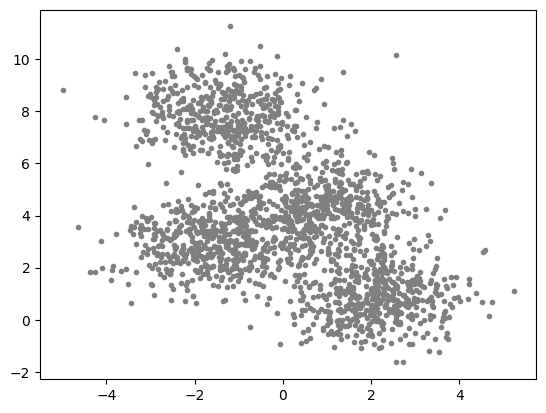

In [5]:
plt.scatter(data[:, 0], data[:, 1], marker = '.',
                color = 'gray', label = 'data points')

In [6]:
import matplotlib.pyplot as plt
def plot(data, centroids):
    plt.scatter(data[:, 0], data[:, 1], marker = '.',
                color = 'gray', label = 'data points')
    plt.scatter(centroids[:, 0], centroids[:, 1],
                color = 'red', label = 'centroid')
    plt.legend()
    plt.xlim(-5, 12)
    plt.ylim(-10, 15)
    plt.show()

In [10]:
# randomly pick some centroids
centroids = data[np.random.choice(len(data), 4, replace=False)]
centroids

array([[-0.07419392,  8.36659139],
       [ 3.45679094,  1.05609751],
       [ 0.94050201,  6.68453268],
       [ 0.22657973,  4.33659608]])

In [11]:
assigned_centroids = np.zeros(len(data), dtype=int)

In [12]:
assigned_centroids

array([0, 0, 0, ..., 0, 0, 0], shape=(2000,))

In [13]:
def compute_l2_distance(x, centroids):
    dist = np.array([]).reshape(len(x), 0)
    for centroid in centroids:
        new_dist = np.sqrt(((x - centroid) ** 2).sum(axis=1)).reshape(-1, 1)
        dist = np.hstack([dist, new_dist])
    return dist

In [14]:
def get_closest_centroid(x, centroids):
    dist = compute_l2_distance(x, centroids)
    closest_centroid_index = np.argmin(dist, axis=1)
    return closest_centroid_index

In [17]:
for n in range(num_iters):
    closest_centroid = get_closest_centroid(data, centroids)
    assigned_centroids = closest_centroid

In [18]:
for c in range(len(centroids)):
    cluster_data = data[assigned_centroids == c]
    new_centroid = cluster_data.mean(axis=0)
    centroids[c] = new_centroid

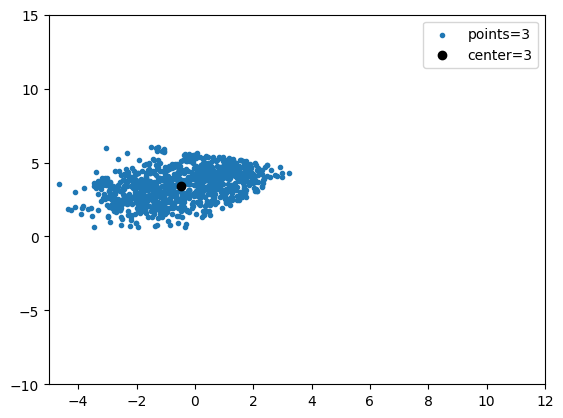

In [19]:
plt.scatter(cluster_data[:, 0], cluster_data[:, 1], marker='.', label=f'points={c}')
plt.scatter(centroids[c][0], centroids[c][1], color='black', label=f'center={c}')
plt.legend()
plt.xlim(-5, 12)
plt.ylim(-10, 15)
plt.show()

[[2.69196988 6.1480522  1.78928187 2.82834638]
 [1.52020665 4.08987221 1.36848654 4.03182018]
 [3.06194559 7.67626282 4.36485612 0.33124753]
 ...
 [0.269757   4.37758403 2.72805202 3.59329972]
 [1.77916948 4.19439234 1.07473019 4.0766497 ]
 [1.17370848 5.07097907 3.9722025  3.52764031]]


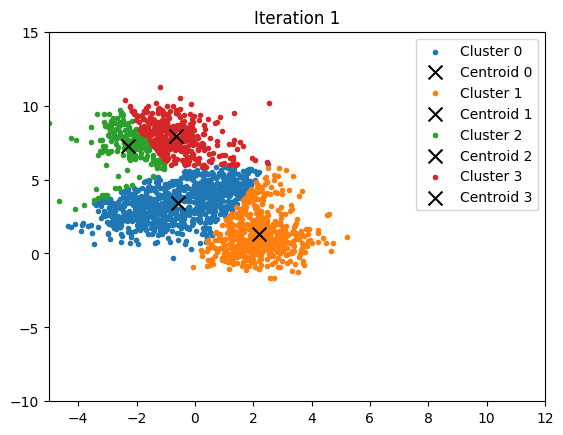

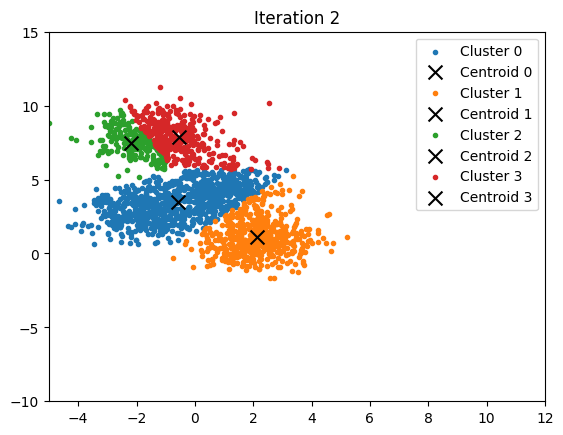

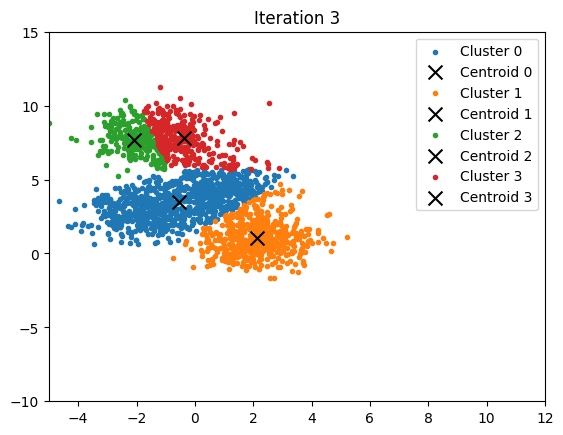

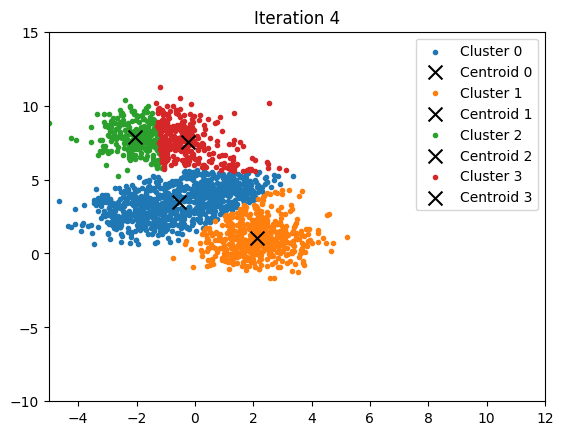

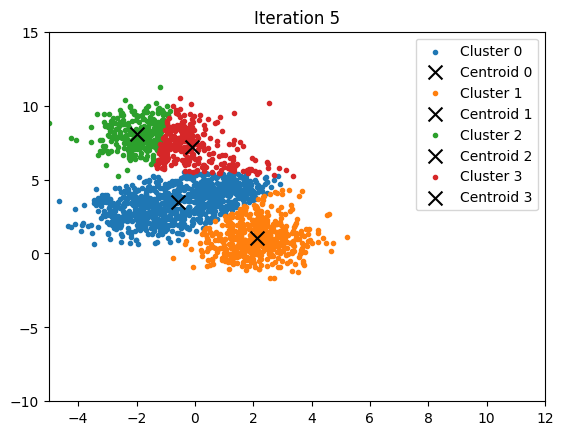

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Assume data is provided (e.g., 2D points); we'll define a sample dataset later
# data: shape (n_samples, n_features), e.g., (200, 2) for 200 2D points
# num_iters: number of iterations, e.g., 5

# Initialize 4 random centroids
n_samples = len(data)  # Number of data points
n_centroids = 4  # Number of clusters
n_features = data.shape[1]  # Number of dimensions (e.g., 2 for 2D)
centroids = np.zeros((n_centroids, n_features))  # Shape: (4, n_features)
for c in range(n_centroids):
    random_index = np.random.randint(0, n_samples)  # Pick a random point index
    centroids[c] = data[random_index]  # Set centroid to that point

# Array to store cluster assignments for each data point
assignments = np.zeros(n_samples, dtype=np.int32)  # Shape: (n_samples,)

# Function to compute Euclidean distances (expanded, as before)
def compute_distances_expanded(x, centroids):
    n_samples = x.shape[0]
    k = centroids.shape[0]
    distances = np.zeros((n_samples, k))  # Shape: (n_samples, k)

    for i in range(n_samples):
        point = x[i]
        for j in range(k):
            centroid = centroids[j]
            squared_diff = 0
            for f in range(len(point)):
                squared_diff += (point[f] - centroid[f]) ** 2
            distance = np.sqrt(squared_diff)
            distances[i, j] = distance

    return distances

print(distances)
# K-means loop
for n in range(num_iters):
    # Step 1: Assign points to nearest centroid
    distances = compute_distances_expanded(data, centroids)  # Shape: (n_samples, n_centroids)

    # Find the closest centroid for each point
    for i in range(n_samples):
        min_distance = distances[i, 0]  # Start with distance to first centroid
        min_centroid = 0  # Index of closest centroid
        for j in range(1, n_centroids):
            if distances[i, j] < min_distance:
                min_distance = distances[i, j]
                min_centroid = j
        assignments[i] = min_centroid  # Assign point to closest centroid

    # Step 2: Update centroids
    for c in range(n_centroids):
        # Find all points assigned to centroid c
        cluster_points = []
        for i in range(n_samples):
            if assignments[i] == c:
                cluster_points.append(data[i])

        # Convert to NumPy array for easier handling
        if len(cluster_points) > 0:  # Avoid empty clusters
            cluster_points = np.array(cluster_points)  # Shape: (n_points_in_cluster, n_features)
            # Compute new centroid as mean of cluster points
            new_centroid = np.zeros(n_features)
            for f in range(n_features):
                sum_feature = 0
                for p in range(len(cluster_points)):
                    sum_feature += cluster_points[p, f]
                new_centroid[f] = sum_feature / len(cluster_points)
            centroids[c] = new_centroid

    # Step 3: Plot clusters and centroids
    plt.figure()  # Create a new figure for this iteration
    for c in range(n_centroids):
        # Collect points in cluster c
        cluster_points = []
        for i in range(n_samples):
            if assignments[i] == c:
                cluster_points.append(data[i])
        cluster_points = np.array(cluster_points) if cluster_points else np.array([])

        # Plot cluster points
        if len(cluster_points) > 0:
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], marker='.', label=f'Cluster {c}')

        # Plot centroid
        plt.scatter(centroids[c][0], centroids[c][1], color='black', marker='x', s=100, label=f'Centroid {c}')

    plt.legend()
    plt.xlim(-5, 12)  # Adjust based on your data
    plt.ylim(-10, 15)
    plt.title(f"Iteration {n+1}")
    plt.show()